In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay ,f1_score ,r2_score

from sklearn.svm import SVR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('balling and roughness (2).xlsx', sheet_name = 'Sheet3')
df

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,Weber number,"surface tension, N/m",spatter,VED,p,pi,spatter.1,m,effective power,ref
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,0.762707,-237.920389,Spatter,37.004658,0.107712,243.608628,blank,Conduction Mode,102.319994,https://www.sciencedirect.com/science/article/...
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,0.946459,-201.276391,Spatter,31.453959,0.091556,222.985317,blank,Conduction Mode,94.121044,NaN
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,1.118781,-172.905271,Spatter,27.351269,0.079614,212.679234,blank,Conduction Mode,86.934645,NaN
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,1.273442,-150.448638,Spatter,24.195353,0.070427,201.928468,blank,Conduction Mode,80.649475,NaN
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,1.405504,-132.335280,Spatter,21.692386,0.063142,197.160224,blank,Conduction Mode,75.139529,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,0.007957,-620.499381,no spatter,176.928521,0.686667,1123.165659,blank,Transition Mode,349.341321,NaN
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,0.011478,-552.006536,no spatter,141.542817,0.549333,947.743444,blank,Transition Mode,347.689251,NaN
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,0.015553,-499.215539,no spatter,117.952347,0.457778,817.866562,blank,Transition Mode,344.664948,NaN
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,0.020133,-456.050759,no spatter,101.102012,0.392381,710.030117,blank,Conduction Mode,340.301603,NaN


In [3]:
# Assuming df is your DataFrame
columns_to_delete = ['ref',
                     'surface temperature T_s , K', 'surface tension, N/m','Peak temp. , K','recoil pressure , pa', 'Unnamed: 20','spatter' ,'p','spatter.1']  # List of columns to delete



# Deleting the specified columns
df1 = df.drop(columns=columns_to_delete, inplace=False)
df1.shape

(301, 26)

In [4]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'LOF': 0, 'keyhole': 1, 'Desired': 2, 'balling': 3}

# Replace values in the 'melt pool shape' column using the mapping
df1['meltpool shape'] = df1['meltpool shape'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'melt pool shape' column:")
df1

DataFrame after replacing values in 'melt pool shape' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,surface tension / spot size,normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,27777.777780,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,Conduction Mode,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,27777.777780,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,Conduction Mode,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,27777.777780,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,Conduction Mode,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,27777.777780,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,Conduction Mode,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,27777.777780,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,Conduction Mode,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,Transition Mode,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,Transition Mode,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,Transition Mode,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,Conduction Mode,340.301603


In [5]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'Conduction Mode': 0, 'Transition Mode': 1, 'Keyhole Mode': 2}

# Replace values in the 'melt pool shape' column using the mapping
df1['m'] = df1['m'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'm' column:")
df1

DataFrame after replacing values in 'm' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,surface tension / spot size,normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,27777.777780,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,27777.777780,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,27777.777780,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,27777.777780,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,27777.777780,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


In [6]:
columns_to_delete = ['surface tension / spot size' ,'depth/thickness',	'length/width' ,	'width/depth']  # List of columns to delete



# Deleting the specified columns
df2 = df1.drop(columns=columns_to_delete, inplace=False)
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,"surface tension force , N",normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,7800,...,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,7800,...,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,7800,...,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,7800,...,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,7800,...,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,7800,...,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,7800,...,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,7800,...,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,7800,...,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


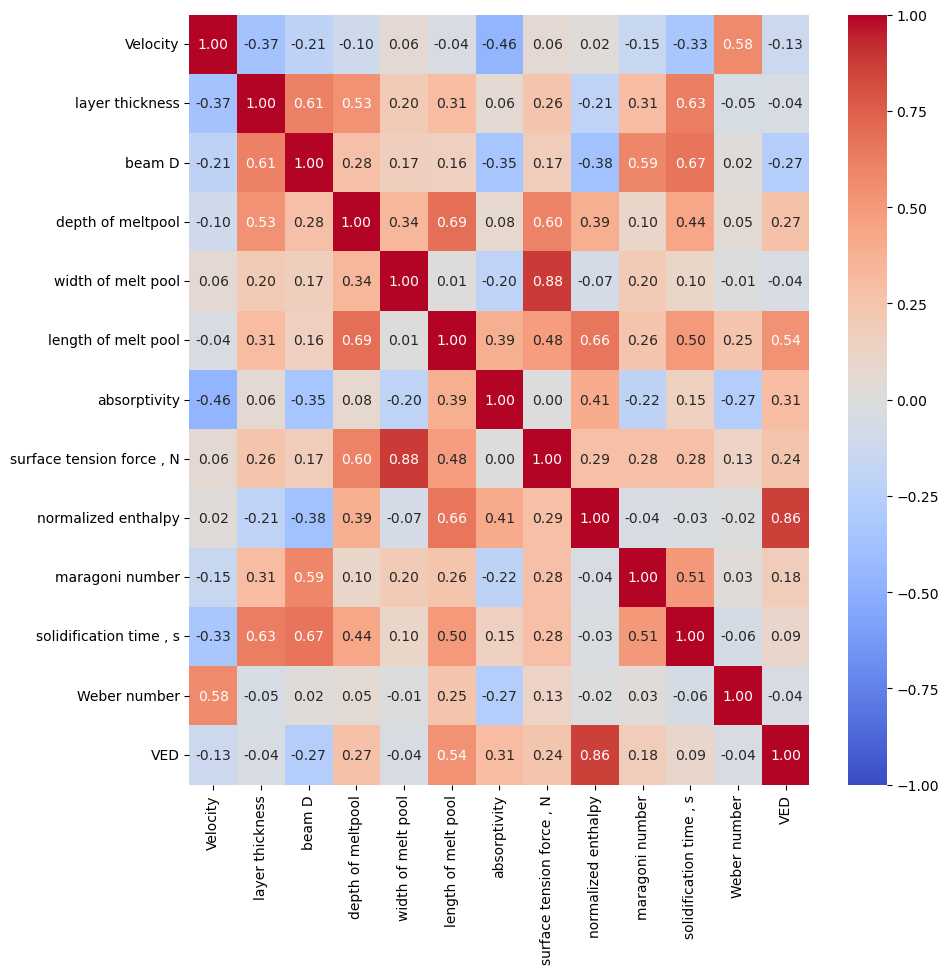

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Define the list of features (independent variables) and the target variable
features = ['Velocity', 'layer thickness', 'beam D',  'depth of meltpool',	'width of melt pool',	'length of melt pool'
            , 'absorptivity', 'surface tension force , N', 
            'normalized enthalpy', 'maragoni number', 
            'solidification time , s', 'Weber number', 'VED']
# target_variable = 'width of melt pool'  # Replace 'target_variable' with your actual target variable

# Calculate the pairwise correlation matrix
correlation_matrix = df2[features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Plot the heatmap of the correlation matrix


# Save the figure
plt.savefig('correlation_heatmap.png', bbox_inches='tight')



In [8]:
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,"surface tension force , N",normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,7800,...,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,7800,...,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,7800,...,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,7800,...,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,7800,...,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,7800,...,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,7800,...,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,7800,...,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,7800,...,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
import pandas as pd

def detect_outliers_zscore_all(df2, num_stds=3):
  """
  This function detects outliers based on z-scores within a specified number of standard deviations for all numerical columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      num_stds (int, optional): The number of standard deviations to consider outliers. Defaults to 3.

  Returns:
      pandas.DataFrame: A DataFrame with columns indicating outliers (True) or inliers (False) for each numerical column.
      pandas.Index: The indices of rows containing outliers in any column.
  """
  outliers_df2 = pd.DataFrame(index=df2.index)  # Create an empty DataFrame for outliers
  outlier_indices = []  # Initialize a list to store outlier row indices
  for col in df2.select_dtypes(include=[np.number]):  # Iterate through numerical columns
    outliers = abs(df2[col] - df2[col].mean()) / df2[col].std() > num_stds
    outliers_df2[f'outliers_{col}'] = outliers  # Add a column named 'outliers_{col}' with outlier flags
    outlier_indices.extend(outliers[outliers].index)  # Add outlier indices to the list
  return outliers_df2, pd.Index(outlier_indices)  # Return outlier flags DataFrame and outlier indices

# Assuming 'filtered_df2' is your prepared DataFrame and 'threshold' is defined

# Calculate z-scores and identify outlier indices
outliers_df2, outlier_indices_zscore = detect_outliers_zscore_all(df2.copy())

# **Important: Consider if removing outliers is the best approach**
# (See previous discussion about potential drawbacks of removing outliers)

# If you decide to remove outliers:
# Drop the rows corresponding to the outlier indices
df3 = df2.drop(outlier_indices_zscore)

# Display the cleaned DataFrame (optional)
print("DataFrame after removing outliers detected by z-score method:")
print(df3.shape)


DataFrame after removing outliers detected by z-score method:
(244, 22)


In [11]:
df3 = df3.dropna()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'filtered_df_cleaned' is your cleaned DataFrame containing the data
# Assuming 'X' contains features and 'y_width' contains the target variable 'width of melt pool'

# Split the dataset into features (X) and the target variable (y_width)
# X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','Power','density kg/m^3',	'Weber number','conductivity w/m.k',	'specific heat J/kg.k'])  # Features excluding the target variable
y_width = df3['width of melt pool']  # Target variable
y_depth = df3['depth of meltpool']
y_length = df3['length of melt pool']

In [13]:
X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','density kg/m^3',	'Weber number','conductivity w/m.k','layer thickness',	'beam D',	'specific heat J/kg.k',	'surface tension force , N',	'normalized enthalpy',	'maragoni number',	'aspect ratio length/depth',	'solidification time , s',	'VED',	'effective power'])

In [14]:
X

,Power,Velocity
0,200,850.0
1,200,1000.0
2,200,1150.0
3,200,1300.0
4,200,1450.0
...,...,...
276,225,140.0
277,225,170.0
278,225,200.0
279,225,290.0


In [15]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.7 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.1 MB/s e

In [16]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
nan_count = y_length.isna().sum()
print(nan_count)


0


In [18]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets for width prediction
X_train_width, X_test_width, y_width_train, y_width_test = train_test_split(X_scaled, y_width, test_size=0.25, random_state=42)

# Define the model
from tensorflow.keras.layers import Input

def create_model(input_dim, activation='relu', num_hidden_layers=1, num_neurons=64, dropout_rate=0.2, optimizer='adam'):
    inputs = Input(shape=(input_dim,))
    x = Dense(num_neurons, activation=activation)(inputs)
    x = Dropout(dropout_rate)(x)
    for _ in range(num_hidden_layers - 1):
        x = Dense(num_neurons, activation=activation)(x)
        x = Dropout(dropout_rate)(x)
    outputs = Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='mse')
    return model


# Define hyperparameters to tune
param_grid = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [8,16,32],
    'dropout_rate': [0.1, 0.2, 0.3],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

def train_and_evaluate(X_train, X_test, y_train, y_test, param_grid, batch_size):
    best_score = np.inf
    best_params = None
    for activation in param_grid['activation']:
        for num_hidden_layers in param_grid['num_hidden_layers']:
            for num_neurons in param_grid['num_neurons']:
                for optimizer in param_grid['optimizer']:
                    model = create_model(X_train.shape[1], activation=activation, num_hidden_layers=num_hidden_layers, num_neurons=num_neurons, optimizer=optimizer)
                    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size, verbose=0)
                    y_pred = model.predict(X_test)
                    
                    # Check for NaN values in predictions
                    if np.isnan(y_pred).any():
                        continue
                    
                    mse = mean_squared_error(y_test, y_pred)
                    if mse < best_score:
                        best_score = mse
                        best_params = {'activation': activation, 'num_hidden_layers': num_hidden_layers, 'num_neurons': num_neurons, 'optimizer': optimizer}
    return best_params, best_score

# Train and evaluate for width prediction
# Train and evaluate for width prediction
best_params_width, best_score_width = train_and_evaluate(X_train_width, X_test_width, y_width_train, y_width_test, param_grid, batch_size=32)
print("Best parameters for width prediction:", best_params_width)
print("Best MSE for width prediction:", best_score_width)



2024-05-08 06:48:51.570004: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 06:48:51.666028: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 06:48:51.949417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 06:48:53.391248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f1743cc83a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━

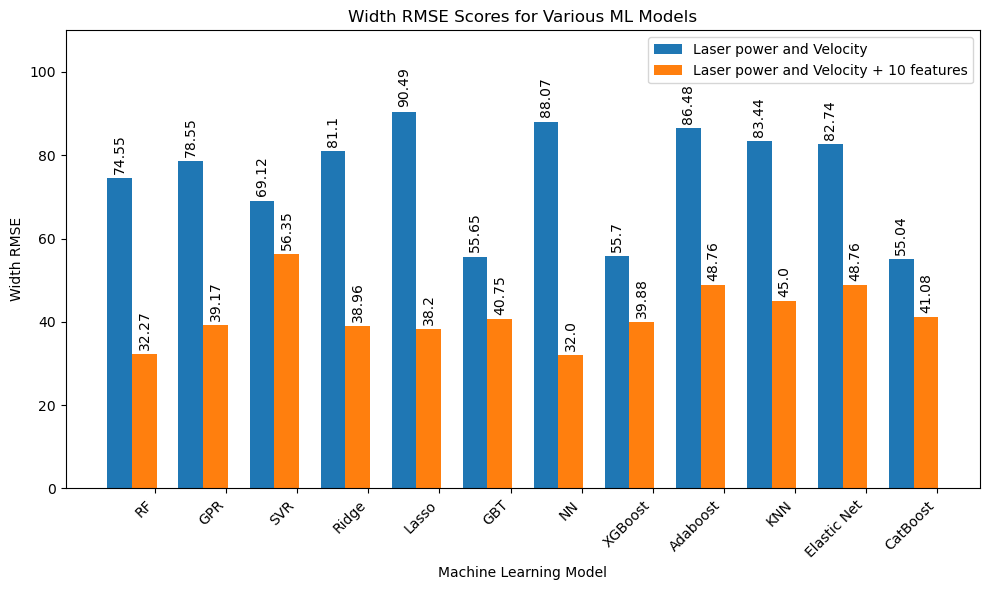

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the first table
models_table2 = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the first table
rmse_table2 = [32.27, 39.17, 56.35, 38.96, 38.20, 40.75, 32.00, 39.88, 48.76, 45.00, 48.76, 41.077]

# Models from the second table
models_table1 = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the second table
rmse_table1 = [74.55, 78.55, 69.12, 81.1, 90.49, 55.65, 88.07, 55.7, 86.48, 83.44, 82.74, 55.04]

# Bar positions

bar_positions_table1 = np.arange(len(models_table1))   # Shift bars to right to separate from table 1 bars
bar_positions_table2 = np.arange(len(models_table2)) + 0.35
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')  # Set background color to sky blue


# Plot bars for table 1
plt.bar(bar_positions_table1, rmse_table1, width=0.35, label='Laser power and Velocity')

# Plot bars for table 2
plt.bar(bar_positions_table2, rmse_table2, width=0.35, label='Laser power and Velocity + 10 features')


for i, value in enumerate(rmse_table1):
    plt.text(i , value + 1, str(round(value, 2)), ha='center', va='bottom', rotation=90)  # Rotate text vertically

    # Add value labels on top of the bars
for i, value in enumerate(rmse_table2):
    plt.text(i+ 0.35, value + 1, str(round(value, 2)), ha='center', va='bottom', rotation=90)  # Rotate text vertically

# Set x-axis labels
plt.xticks(bar_positions_table2 + 0.150, models_table2, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Width RMSE Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Width RMSE')

plt.ylim(0, 110)
plt.tight_layout()
plt.savefig('width_rmse_plot.png', dpi=1800)
plt.show()


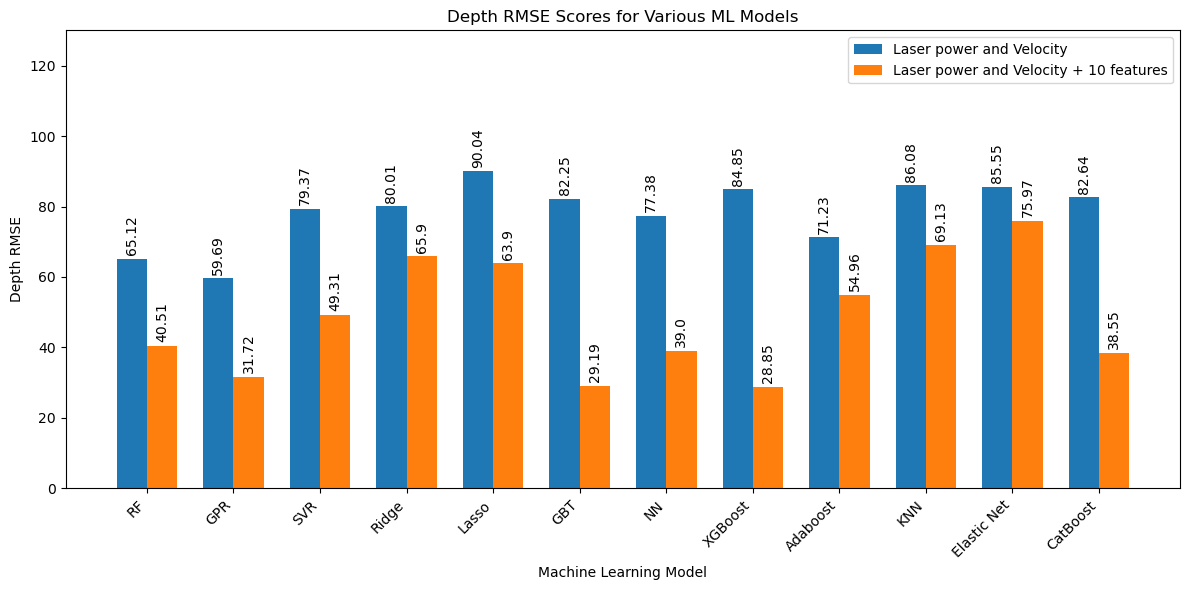

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the second table
models_table1_depth = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the second table for depth prediction
rmse_table1_depth = [65.12, 59.69, 79.37, 80.01, 90.04, 82.25, 77.38, 84.85, 71.23, 86.076, 85.55, 82.64]

# Models from the first table
models_table2_depth = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the first table for depth prediction
rmse_table2_depth = [40.51, 31.72, 49.31, 65.9, 63.9, 29.19, 39.0, 28.85, 54.96, 69.13, 75.97, 38.55]

# Bar positions
bar_positions_table1_depth = np.arange(len(models_table1_depth))
bar_positions_table2_depth = np.arange(len(models_table2_depth)) + 0.35  # Shift bars to right to separate from table 1 bars

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')  # Set background color to white

# Plot bars for table 1
plt.bar(bar_positions_table1_depth, rmse_table1_depth, width=0.35, label='Laser power and Velocity')

# Plot bars for table 2
plt.bar(bar_positions_table2_depth, rmse_table2_depth, width=0.35, label='Laser power and Velocity + 10 features')

# Add value labels on top of the bars
for i, value in enumerate(rmse_table1_depth):
    plt.text(bar_positions_table1_depth[i], value + 1, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

for i, value in enumerate(rmse_table2_depth):
    plt.text(bar_positions_table2_depth[i], value + 1, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

# Set x-axis labels
plt.xticks(bar_positions_table1_depth + 0.175, models_table1_depth, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Depth RMSE Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Depth RMSE')

plt.ylim(0, 130)
plt.tight_layout()

# Save the plot in high quality
plt.savefig('depth_rmse_plot.png', dpi=1800)
plt.show()


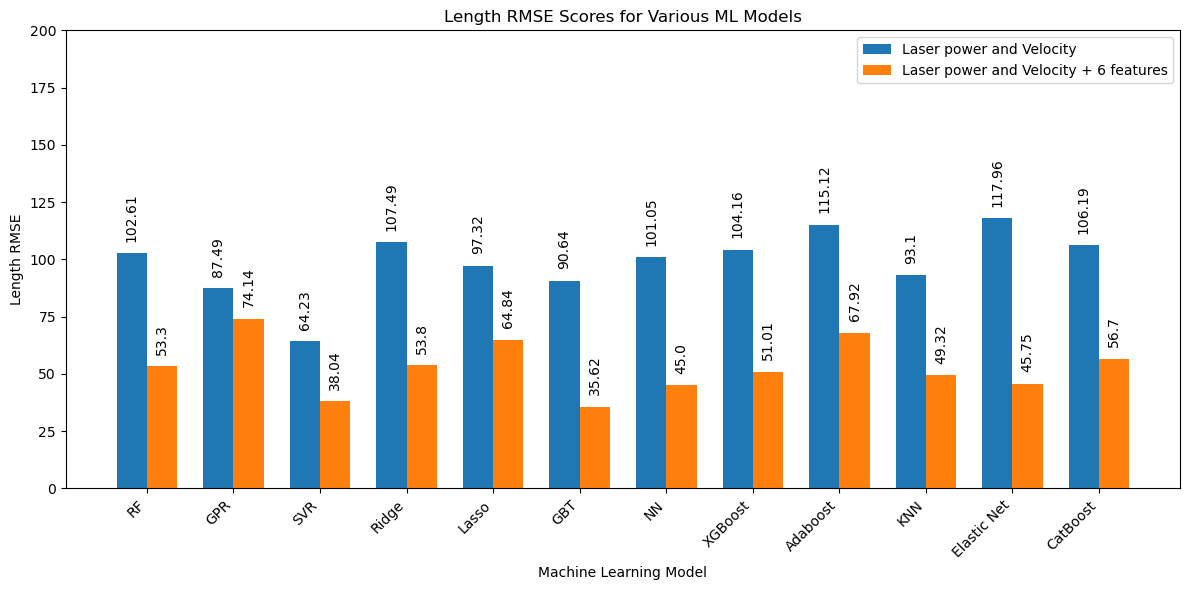

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the second table
models_table1_length = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the second table for length prediction
rmse_table1_length = [102.61, 87.49, 64.23, 107.49, 97.32, 90.64, 101.05, 104.16, 115.12, 93.1, 117.96, 106.19]

# Models from the first table
models_table2_length = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# RMSE scores from the first table for length prediction
rmse_table2_length = [53.3, 74.14, 38.04, 53.8, 64.84, 35.62, 45.0, 51.01, 67.92, 49.32, 45.75, 56.7]

# Bar positions
bar_positions_table1_length = np.arange(len(models_table1_length))
bar_positions_table2_length = np.arange(len(models_table2_length)) + 0.35  # Shift bars to right to separate from table 1 bars

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')  # Set background color to white

# Plot bars for table 1
plt.bar(bar_positions_table1_length, rmse_table1_length, width=0.35, label='Laser power and Velocity')

# Plot bars for table 2
plt.bar(bar_positions_table2_length, rmse_table2_length, width=0.35, label='Laser power and Velocity + 6 features')

# Add value labels on top of the bars
for i, value in enumerate(rmse_table1_length):
    plt.text(bar_positions_table1_length[i], value + 5, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

for i, value in enumerate(rmse_table2_length):
    plt.text(bar_positions_table2_length[i], value + 5, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

# Set x-axis labels
plt.xticks(bar_positions_table1_length + 0.175, models_table1_length, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Length RMSE Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Length RMSE')

plt.ylim(0, 200)
plt.tight_layout()

# Save the plot in high quality
plt.savefig('length_rmse_plot.png', dpi=1800)
plt.show()


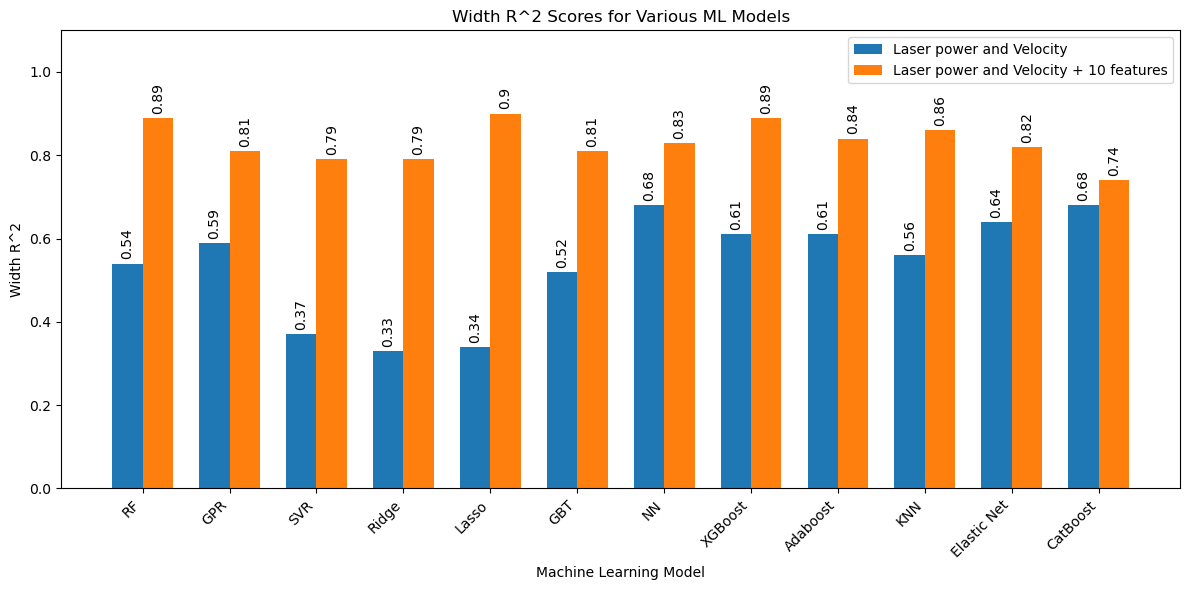

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the second table
models_table1_width = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the second table for width prediction
r2_table1_width = [0.54, 0.59, 0.37, 0.33, 0.34, 0.52, 0.68, 0.61, 0.61, 0.56, 0.64, 0.68]

# Models from the first table
models_table2_width = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the first table for width prediction
r2_table2_width = [0.89, 0.81, 0.79, 0.79, 0.9, 0.81, 0.83, 0.89, 0.84, 0.86, 0.82, 0.74]

# Bar positions
bar_positions_table1_width = np.arange(len(models_table1_width))
bar_positions_table2_width = np.arange(len(models_table2_width)) + 0.35  # Shift bars to right to separate from table 1 bars

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')  # Set background color to white

# Plot bars for table 1
plt.bar(bar_positions_table1_width, r2_table1_width, width=0.35, label='Laser power and Velocity')

# Plot bars for table 2
plt.bar(bar_positions_table2_width, r2_table2_width, width=0.35, label='Laser power and Velocity + 10 features')

# Add value labels on top of the bars
for i, value in enumerate(r2_table1_width):
    plt.text(bar_positions_table1_width[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

for i, value in enumerate(r2_table2_width):
    plt.text(bar_positions_table2_width[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

# Set x-axis labels
plt.xticks(bar_positions_table1_width + 0.175, models_table1_width, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Width R^2 Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Width R^2')

plt.ylim(0, 1.1)
plt.tight_layout()

# Save the plot in high quality
plt.savefig('width_r2_plot.png', dpi=1800)
plt.show()


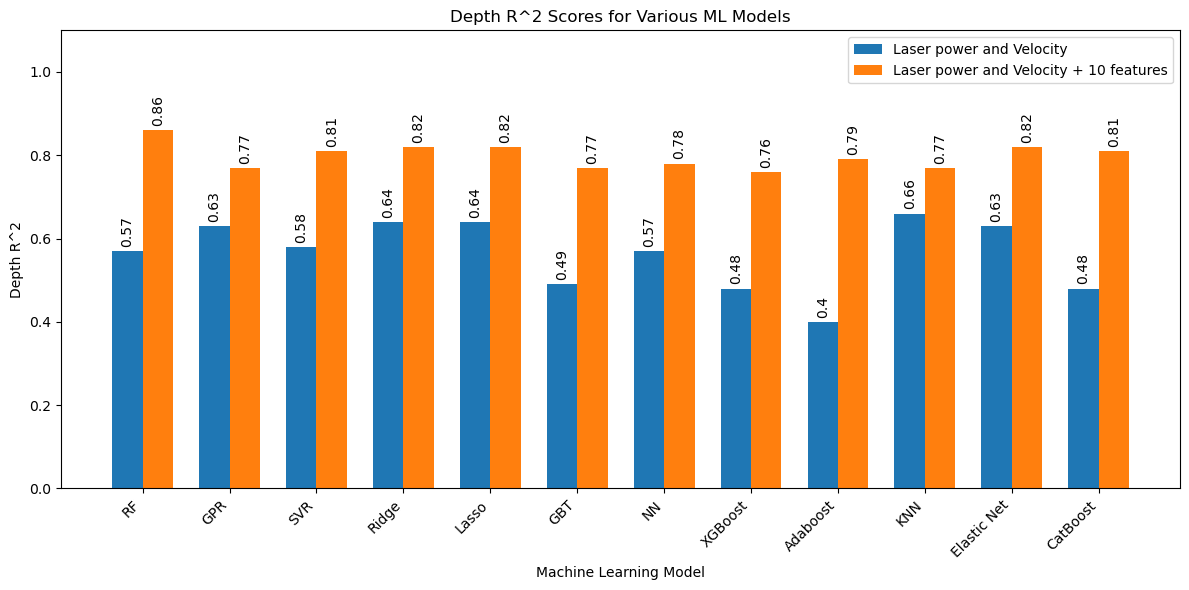

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the second table
models_table1_depth = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the second table for depth prediction
r2_table1_depth = [0.57, 0.63, 0.58, 0.64, 0.64, 0.49, 0.57, 0.48, 0.40, 0.66, 0.63, 0.48]

# Models from the first table
models_table2_depth = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the first table for depth prediction
r2_table2_depth = [0.86, 0.77, 0.81, 0.82, 0.82, 0.77, 0.78, 0.76, 0.79, 0.77, 0.82, 0.81]

# Bar positions
bar_positions_table1_depth = np.arange(len(models_table1_depth))
bar_positions_table2_depth = np.arange(len(models_table2_depth)) + 0.35  # Shift bars to right to separate from table 1 bars

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')  # Set background color to white

# Plot bars for table 1
plt.bar(bar_positions_table1_depth, r2_table1_depth, width=0.35, label='Laser power and Velocity')

# Plot bars for table 2
plt.bar(bar_positions_table2_depth, r2_table2_depth, width=0.35, label='Laser power and Velocity + 10 features')

# Add value labels on top of the bars
for i, value in enumerate(r2_table1_depth):
    plt.text(bar_positions_table1_depth[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

for i, value in enumerate(r2_table2_depth):
    plt.text(bar_positions_table2_depth[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

# Set x-axis labels
plt.xticks(bar_positions_table1_depth + 0.175, models_table1_depth, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Depth R^2 Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Depth R^2')

plt.ylim(0, 1.1)
plt.tight_layout()

# Save the plot in high quality
plt.savefig('depth_r2_plot.png', dpi=1800)
plt.show()


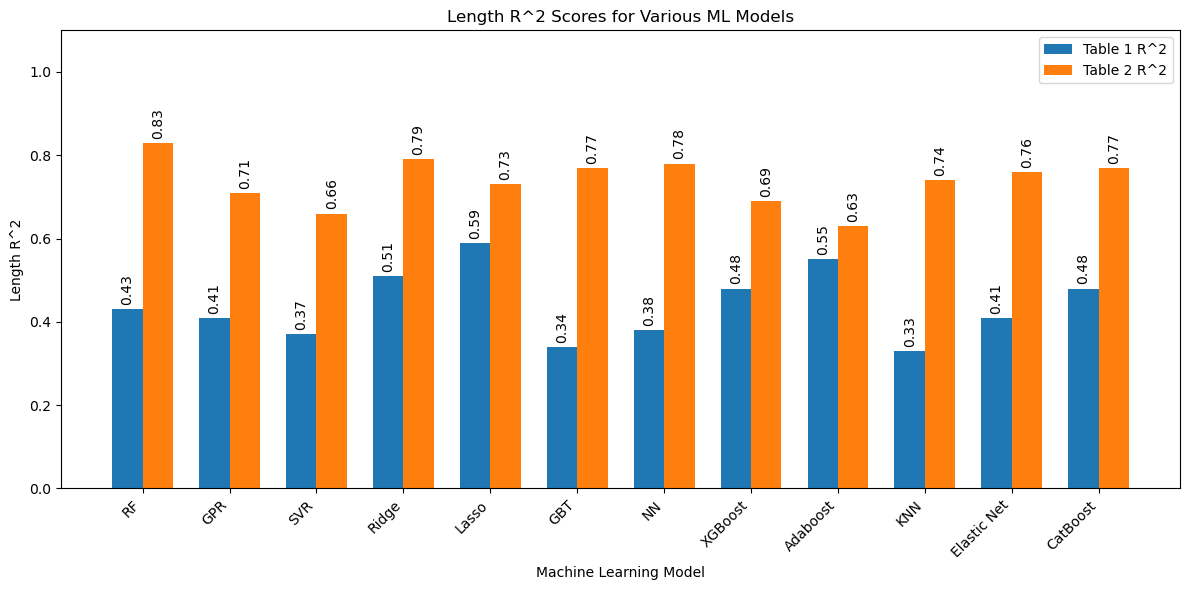

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Models from the second table
models_table1_length = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the second table for length prediction
r2_table1_length = [0.43, 0.41, 0.37, 0.51, 0.59, 0.34, 0.38, 0.48, 0.55, 0.33, 0.41, 0.48]

# Models from the first table
models_table2_length = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'GBT', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'Elastic Net', 'CatBoost']

# R^2 scores from the first table for length prediction
r2_table2_length = [0.83, 0.71, 0.66, 0.79, 0.73, 0.77, 0.78, 0.69, 0.63, 0.74, 0.76, 0.77]

# Bar positions
bar_positions_table1_length = np.arange(len(models_table1_length))
bar_positions_table2_length = np.arange(len(models_table2_length)) + 0.35  # Shift bars to right to separate from table 1 bars

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')  # Set background color to white

# Plot bars for table 1
plt.bar(bar_positions_table1_length, r2_table1_length, width=0.35, label='Table 1 R^2')

# Plot bars for table 2
plt.bar(bar_positions_table2_length, r2_table2_length, width=0.35, label='Table 2 R^2')

# Add value labels on top of the bars
for i, value in enumerate(r2_table1_length):
    plt.text(bar_positions_table1_length[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

for i, value in enumerate(r2_table2_length):
    plt.text(bar_positions_table2_length[i], value + 0.01, str(round(value, 2)), ha='center', va='bottom', rotation=90)  

# Set x-axis labels
plt.xticks(bar_positions_table1_length + 0.175, models_table1_length, rotation=45, ha='right')

# Add legend and labels
plt.legend()
plt.title('Length R^2 Scores for Various ML Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Length R^2')

plt.ylim(0, 1.1)
plt.tight_layout()

# Save the plot in high quality
plt.savefig('length_r2_plot.png', dpi=1800)
plt.show()
